In [1]:
#You measure the position of a star times with the same telescope i.e. errors are
#homoscedastic. Let's say the underlying process is Gaussian, the true position is mu =1
#(in suitable units), and the errors are sigma = 0.2

In [2]:
#Part 1
#Generate fake measurements. Treat each of these observations as an estimate of the
#true distribution. So we'll center a Gaussian (with the known sigma) at each point. This is
#the probability of each data point, p(xi| mu, sigma) .

#Plot each of the individual likelihoods separately. Also plot their product (i.e. the
#likelihood of the dataset {xi} ). Make sure the x grid has enough points.
#Just read off the maximum likelihood solution (e.g. using np.argsort )

#Compare it with the MLE estimator derived above

In [3]:
#Part 2
#Check the Fisher matrix error estimate makes sense
#do a rough 2ndm order differentation of our log-likelihood function with np.diff ,
#divide through DeltaTetha^2 by our to get the correct normalization,
#multiply by -1,
#then take the square root.
#Compare with the Fisher matrix error derived above
#Plot a Gaussian at the measured mu with this error as the scale to see if it matches the
#numerical likelihood distribution. (The normalization won't be captured, you can
#rescale it as you like to check it agrees)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [5]:
N = 5               # Number of measurements
true_mu = 1.0       # True position of the star
sigma = 0.2         # Known measurement uncertainty
np.random.seed(42)  

In [6]:
#Generate N fake Gaussian measurements of the star position
def generate_measurements(N, mu, sigma):
    return norm(mu, sigma).rvs(N)

# Generate measurements
sample = generate_measurements(N, true_mu, sigma)
print(f"Generated measurements: {sample}")

Generated measurements: [1.09934283 0.97234714 1.12953771 1.30460597 0.95316933]


In [7]:
#Compute individual likelihoods centered on each measurement
def compute_individual_likelihoods(sample, xgrid, sigma):
    return np.array([norm.pdf(xgrid, loc=s, scale=sigma) for s in sample])

xgrid = np.linspace(0, 2, 1000)
# Compute individual and combined likelihoods
individual_Ls = compute_individual_likelihoods(sample, xgrid, sigma)
total_L = np.prod(individual_Ls, axis=0)

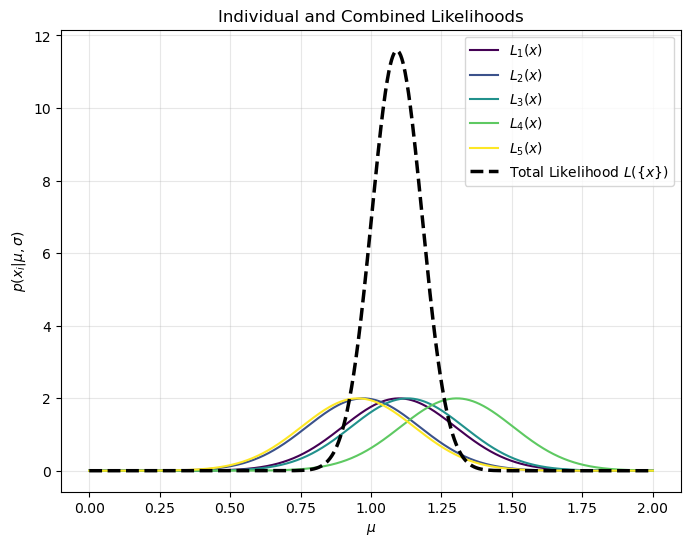

In [8]:
#Plot individual likelihoods and the total likelihood
def plot_likelihoods(xgrid, individual_likelihoods, combined_likelihood):
    plt.figure(figsize=(8, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(individual_likelihoods)))

    for idx, thisL in enumerate(individual_likelihoods):
        plt.plot(xgrid, thisL, color=colors[idx], lw=1.5, label=f'$L_{{{idx+1}}}(x)$')

    plt.plot(xgrid, combined_likelihood, 'k--', lw=2.5, label='Total Likelihood $L(\\{x\\})$')
    plt.xlabel('$\\mu$')
    plt.ylabel('$p(x_i|\\mu,\\sigma)$')
    plt.title('Individual and Combined Likelihoods')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Plot individual likelihoods and combined likelihood
plot_likelihoods(xgrid, individual_Ls, total_L)

In [9]:
#Estimate the Maximum Likelihood Estimator (MLE) from the likelihood curve
def estimate_mle(xgrid, combined_likelihood):
    index_max = np.argmax(combined_likelihood)
    mle_estimate = xgrid[index_max]
    return mle_estimate, index_max

# MLE estimation
mle, index_max = estimate_mle(xgrid, total_L)
mean_estimator = np.mean(sample)
print(f"\nMaximum Likelihood Estimate (grid search): {mle:.4f}")
print(f"Mean of measurements (analytical MLE): {mean_estimator:.4f}")


Maximum Likelihood Estimate (grid search): 1.0911
Mean of measurements (analytical MLE): 1.0918


In [10]:
#Estimate the uncertainty on mu using Fisher matrix (2nd derivative of log-likelihood)
def fisher_matrix_error(combined_likelihood, xgrid, index_max):
    d2_logL = np.diff(np.log(combined_likelihood), n=2)
    d2_logL /= (xgrid[1] - xgrid[0])**2
    fisher_info = -d2_logL[index_max - 1]  # shift by 1 due to diff
    sigma_mu = 1 / np.sqrt(fisher_info)
    return sigma_mu

# Fisher Matrix error estimation
sigma_mu_numeric = fisher_matrix_error(total_L, xgrid, index_max)
sigma_mu_analytical = sigma / np.sqrt(N)
print(f"\nFisher Matrix error (numerical): {sigma_mu_numeric:.4f}")
print(f"Fisher Matrix error (analytical): {sigma_mu_analytical:.4f}")


Fisher Matrix error (numerical): 0.0894
Fisher Matrix error (analytical): 0.0894


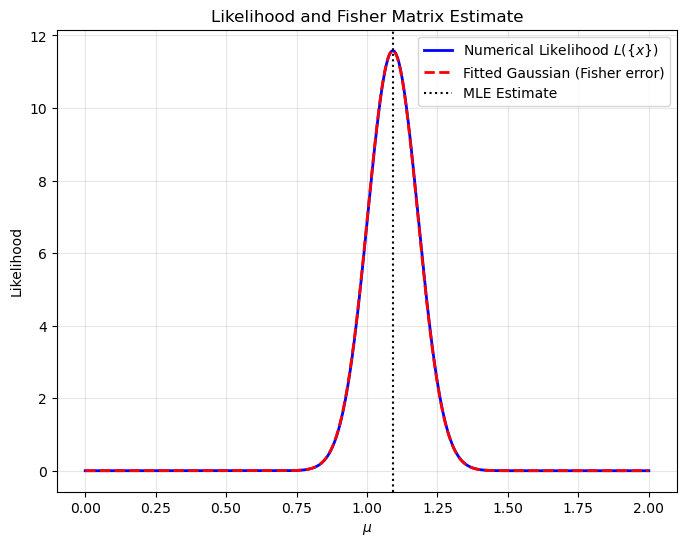

In [11]:
#Overlay fitted Gaussian using Fisher error estimate on top of likelihood
def plot_likelihood_with_gaussian(xgrid, combined_likelihood, mle, fisher_sigma):
    fitted_likelihood = norm.pdf(xgrid, loc=mle, scale=fisher_sigma)
    scaling_factor = combined_likelihood.max() / fitted_likelihood.max()

    plt.figure(figsize=(8, 6))
    plt.plot(xgrid, combined_likelihood, 'b-', lw=2, label='Numerical Likelihood $L(\\{x\\})$')
    plt.plot(xgrid, scaling_factor * fitted_likelihood, 'r--', lw=2, label='Fitted Gaussian (Fisher error)')
    plt.axvline(mle, color='k', ls=':', lw=1.5, label='MLE Estimate')
    plt.xlabel('$\\mu$')
    plt.ylabel('Likelihood')
    plt.title('Likelihood and Fisher Matrix Estimate')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


# Plot Likelihood and fitted Gaussian
plot_likelihood_with_gaussian(xgrid, total_L, mle, sigma_mu_analytical)